# Required Libraries

In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

# Extract File name from Folder

In [2]:
image_filenames = []
for file in os.listdir(r"D:\Fashion dataset\archive\fashion-dataset\fashion-dataset\images"):
    image_filenames.append(os.path.join(r"D:\Fashion dataset\archive\fashion-dataset\fashion-dataset\images", file))


In [3]:
len(image_filenames)

44441

# Importing ResNet50 Model and Cofiguration

In [4]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


# Extracting Features from Image

In [5]:
img = image.load_img(r"D:\Fashion dataset\upload image\Coolingglass.jpg", target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 3s 3s/step


array([0.01797193, 0.01885296, 0.03315124, ..., 0.02128529, 0.01989793,
       0.04801065], dtype=float32)

In [6]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(image_filenames[0], model)

1/1 [==============================] - 0s 285ms/step


array([0.01886866, 0.01673302, 0.00399701, ..., 0.0081095 , 0.01061402,
       0.057082  ], dtype=float32)

In [8]:
image_features = []
for file in image_filenames[0:5000]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 [==============================] - 0s 103ms/step


[array([0.01886866, 0.01673302, 0.00399701, ..., 0.0081095 , 0.01061402,
        0.057082  ], dtype=float32),
 array([0.        , 0.02039721, 0.        , ..., 0.        , 0.        ,
        0.04172785], dtype=float32),
 array([0.00059426, 0.0341487 , 0.0140036 , ..., 0.        , 0.        ,
        0.02302493], dtype=float32),
 array([0.01809287, 0.06029443, 0.00208153, ..., 0.01785666, 0.02855487,
        0.06173431], dtype=float32),
 array([0.02202036, 0.01658256, 0.        , ..., 0.0080362 , 0.02135412,
        0.02802397], dtype=float32),
 array([0.        , 0.11091926, 0.01128505, ..., 0.        , 0.01216775,
        0.02490792], dtype=float32),
 array([0.00928842, 0.10958572, 0.00514373, ..., 0.00458976, 0.03560192,
        0.0313182 ], dtype=float32),
 array([0.        , 0.12425708, 0.00651038, ..., 0.        , 0.00952098,
        0.03090201], dtype=float32),
 array([0.00637801, 0.09182653, 0.00335864, ..., 0.0021675 , 0.0224888 ,
        0.03567933], dtype=float32),
 array([0.

In [9]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [10]:
filenames = pkl.dump(image_filenames, open('filenames.pkl','wb'))

# Loading Pickle Files

In [11]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [12]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [13]:
np.array(Image_features).shape

(5000, 2048)

# Finidng Similar Images with Help of Algorithm

In [14]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [15]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [16]:
input_image = extract_features_from_images(r"D:\Fashion dataset\upload image\Coolingglass.jpg",model)

1/1 [==============================] - 0s 146ms/step


In [17]:
distance,indices = neighbors.kneighbors([input_image])

In [18]:
indices

array([[3545, 3536,  238, 1620,  256,  296]], dtype=int64)

In [19]:
from IPython.display import Image

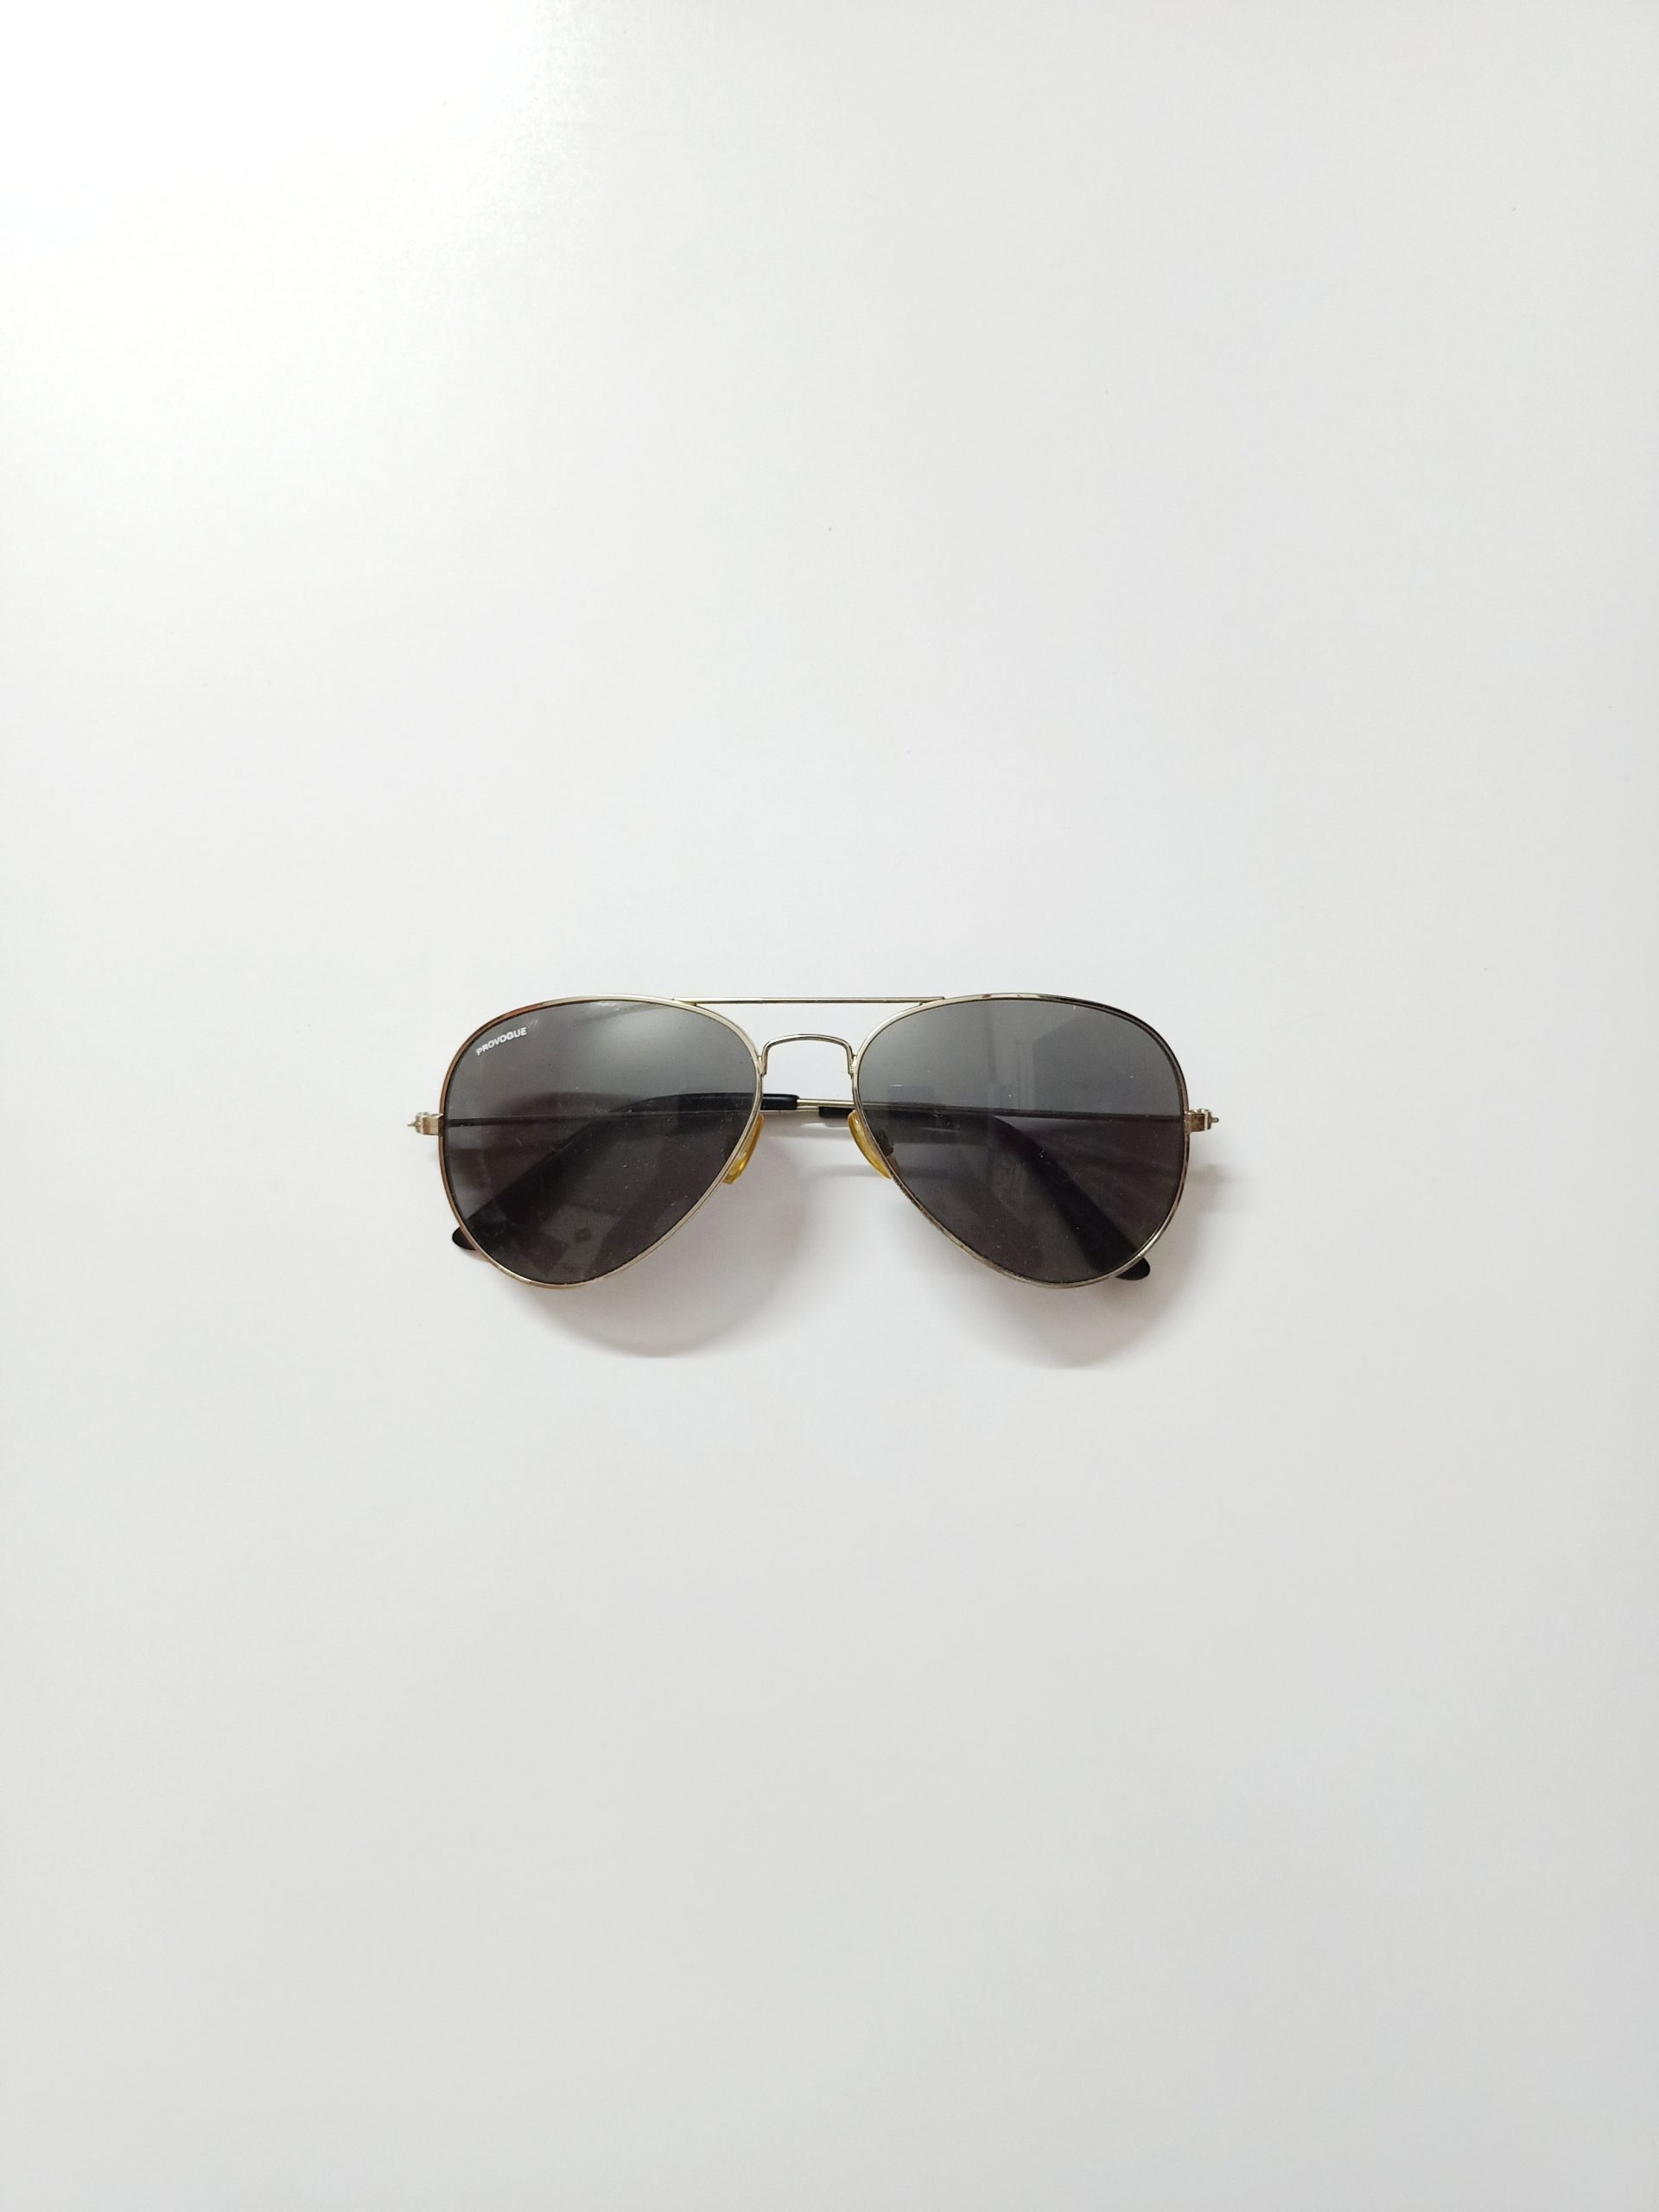

In [20]:
Image(r"D:\Fashion dataset\upload image\Coolingglass.jpg")

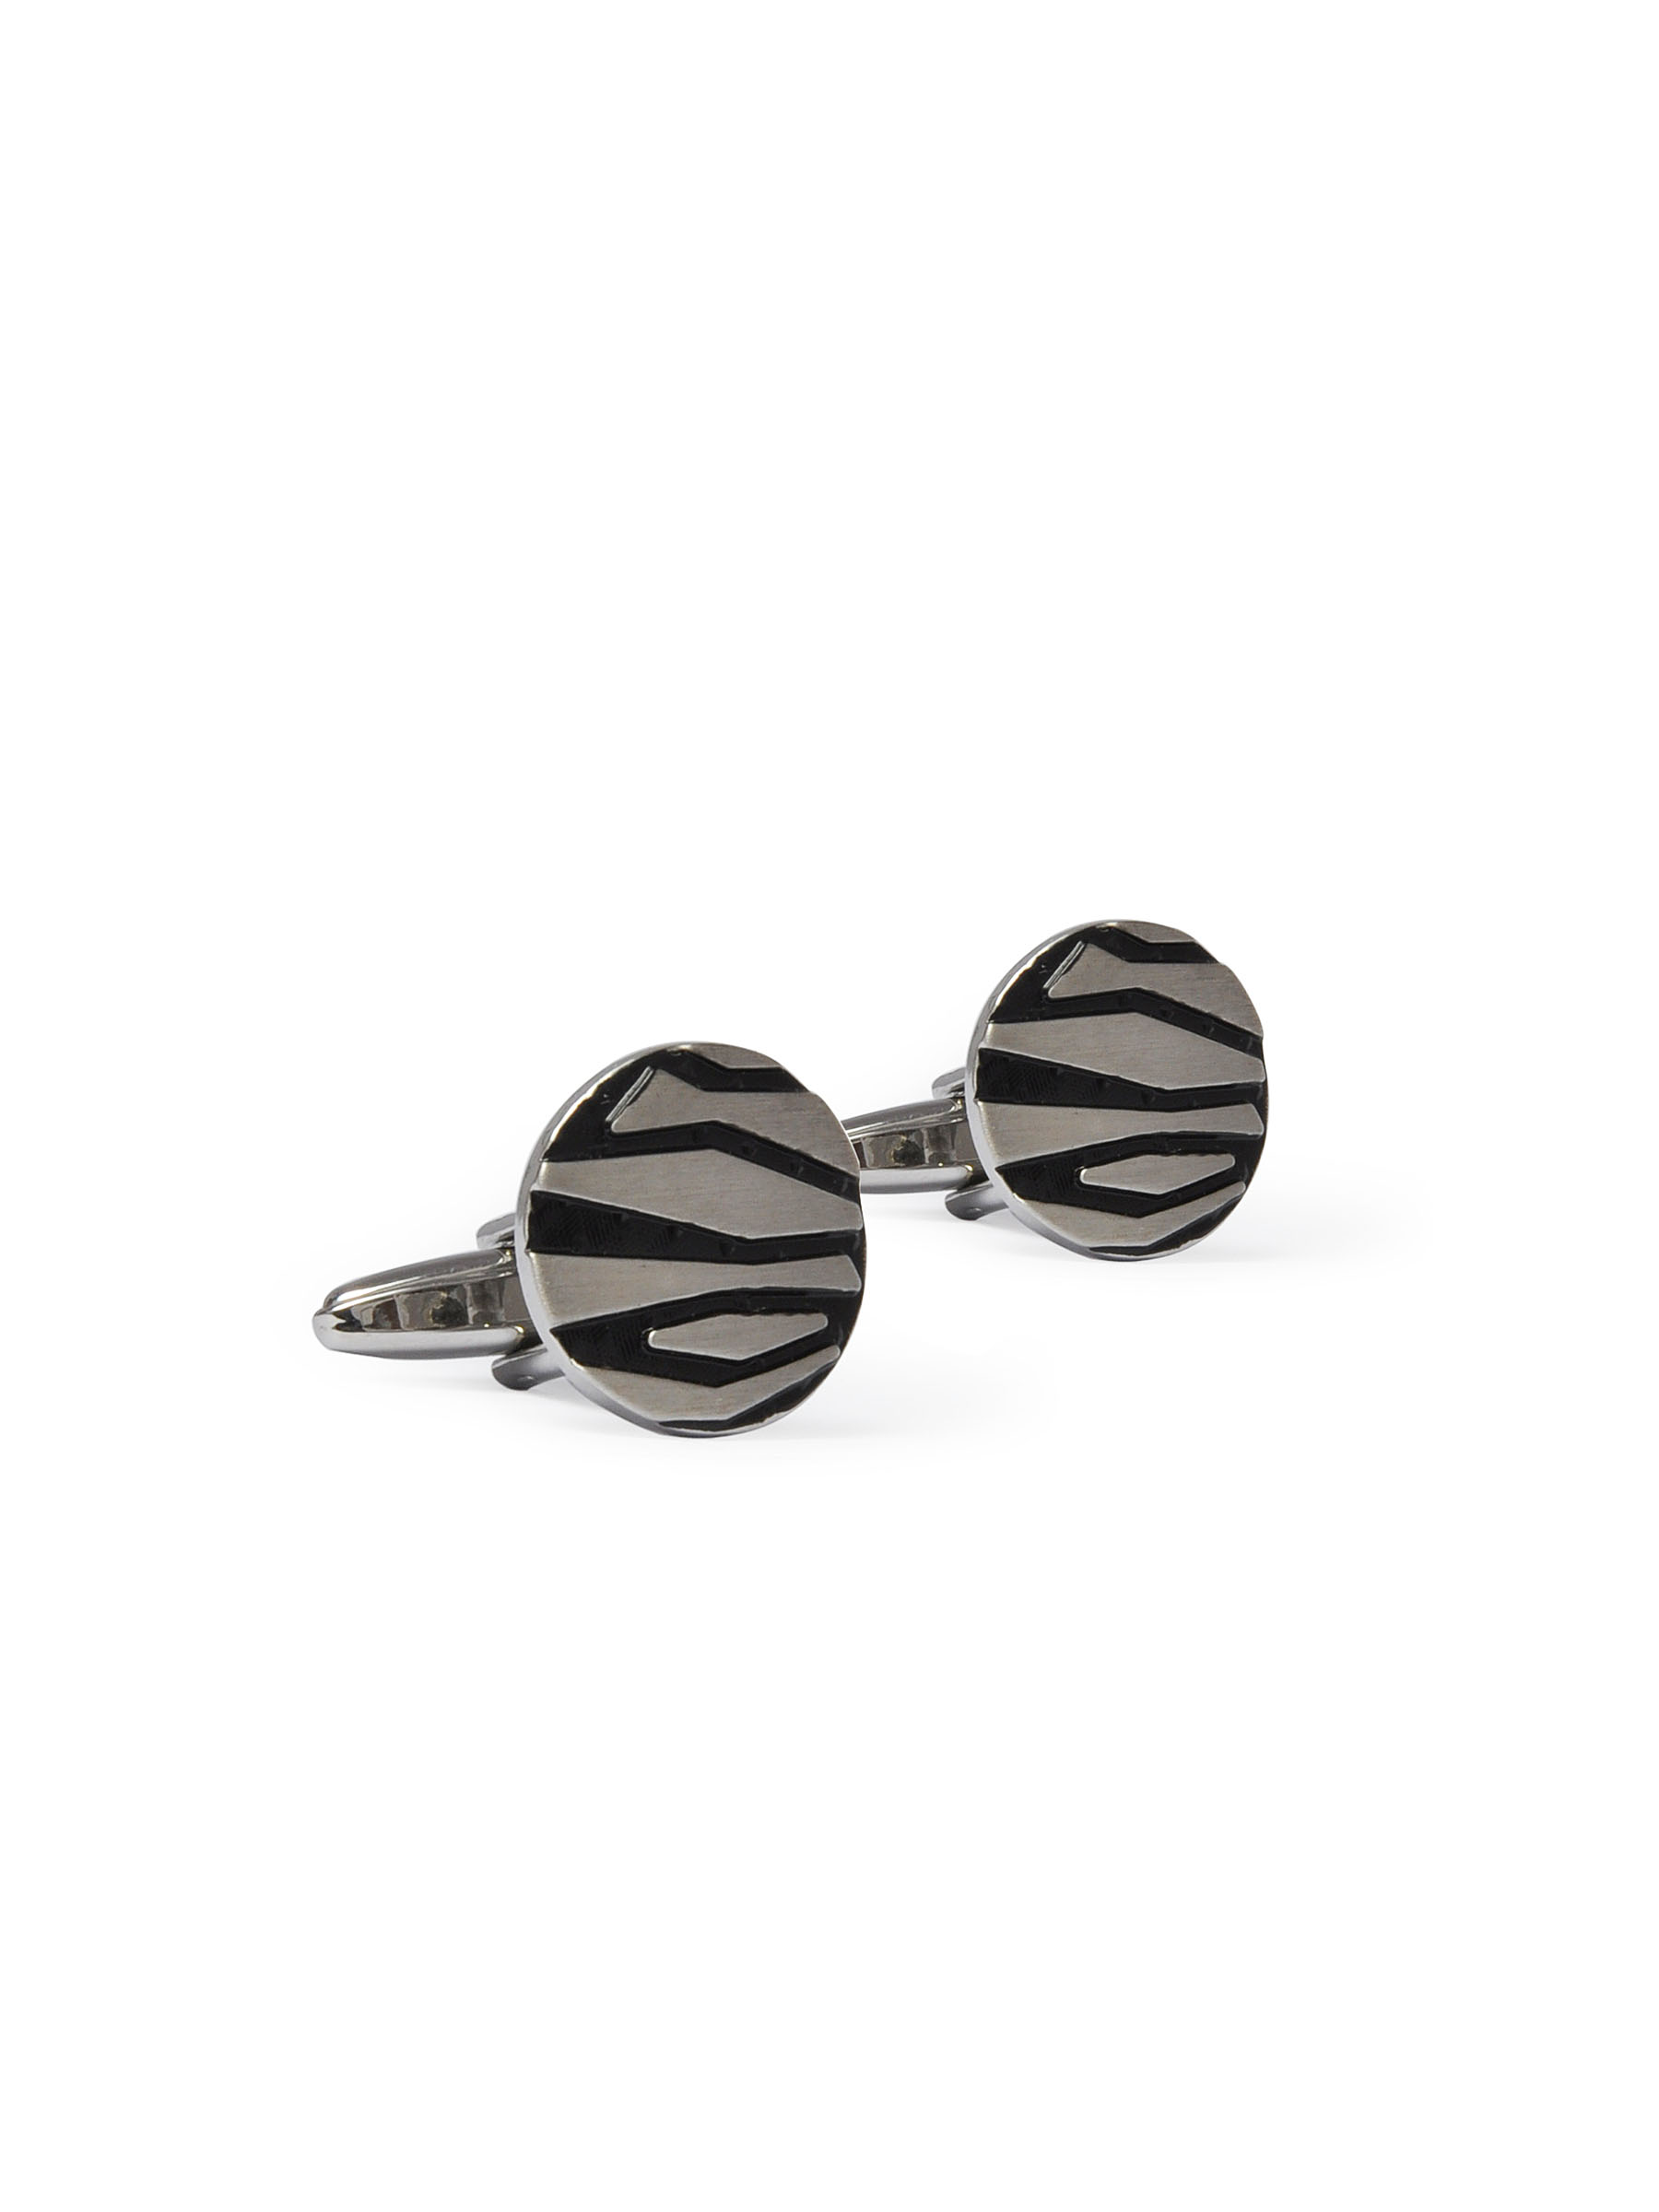

In [21]:
Image(filenames[indices[0][1]])